# Data exploring

In [1]:
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"C:\Users\USER\Downloads\Statewide Solar Projects.csv", low_memory=False)

In [4]:
df.columns

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'County', 'Zip', 'Division', 'Substation', 'Circuit ID',
       'Developer', 'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218115 entries, 0 to 218114
Data columns (total 17 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   Data Through Date                            218115 non-null  object 
 1   Project ID                                   218112 non-null  object 
 2   Interconnection Date                         218115 non-null  object 
 3   Utility                                      218115 non-null  object 
 4   City/Town                                    218057 non-null  object 
 5   County                                       218115 non-null  object 
 6   Zip                                          218019 non-null  float64
 7   Division                                     132881 non-null  object 
 8   Substation                                   138171 non-null  object 
 9   Circuit ID                                   218085 non-nul

In [6]:
df.describe(include='all')

,Data Through Date,Project ID,Interconnection Date,Utility,City/Town,County,Zip,Division,Substation,Circuit ID,Developer,Metering Method,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Energy Storage System Size (kWac),Number of Projects
count,218115,218112,218115,218115,218057,218115,218019.000000,132881,138171,218085,207565,217652,218115.000000,218115.000000,2.181150e+05,4091.000000,218115.0
unique,1,218077,5411,7,3009,62,NaN,109,2255,6429,2567,6,NaN,NaN,NaN,NaN,NaN
top,12/31/2023,LDG-00037,2/11/2016,PSEGLI,STATEN ISLAND,Suffolk,NaN,CENY-Q,Jamaica,JA NWK,Vivint Solar,NM,NaN,NaN,NaN,NaN,NaN
freq,218115,2,313,85110,6884,51715,NaN,21813,11581,1015,12822,215192,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11751.734473,NaN,NaN,NaN,NaN,NaN,24.507977,19.065451,2.876828e+04,32.174727,1.0
std,NaN,NaN,NaN,NaN,NaN,NaN,962.129108,NaN,NaN,NaN,NaN,NaN,291.525394,211.419642,3.422042e+05,296.161116,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,10001.000000,NaN,NaN,NaN,NaN,NaN,0.010000,0.010000,1.400000e+01,0.350000,1.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,11220.000000,NaN,NaN,NaN,NaN,NaN,5.270000,4.500000,6.180000e+03,5.000000,1.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,11717.000000,NaN,NaN,NaN,NaN,NaN,7.130000,6.090000,8.364000e+03,7.600000,1.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,12018.000000,NaN,NaN,NaN,NaN,NaN,10.240000,8.750000,1.201700e+04,10.000000,1.0


In [7]:
df.isnull().sum()

Data Through Date                                   0
Project ID                                          3
Interconnection Date                                0
Utility                                             0
City/Town                                          58
County                                              0
Zip                                                96
Division                                        85234
Substation                                      79944
Circuit ID                                         30
Developer                                       10550
Metering Method                                   463
Estimated PV System Size (kWdc)                     0
PV System Size (kWac)                               0
Estimated Annual PV Energy Production (kWh)         0
Energy Storage System Size (kWac)              214024
Number of Projects                                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Data Preprocessing

In [5]:
# Rename the column
df.rename(columns={'County': 'Country'}, inplace=True) 

In [6]:
# convert date to date time formate
df['Data Through Date'] = pd.to_datetime(df['Data Through Date'])
df['Interconnection Date'] = pd.to_datetime(df['Interconnection Date'])

In [7]:
#removing blanks from 'Project ID'
missing_project_id_rows = df[df['Project ID'].isnull()].index
print(missing_project_id_rows)

df = df.drop(missing_project_id_rows)

Index([218112, 218113, 218114], dtype='int64')


In [8]:
# removing blanks from 'Zip;'
missing_Zip_rows = df[df['Zip'].isnull()].index
print(missing_Zip_rows)

df = df.drop(missing_Zip_rows)

Index([ 71114,  71723,  72073,  72767,  78009,  78069,  80996,  82124,  87576,
        89082,  89474,  96130,  96915,  96916,  97558,  97777,  97821,  98115,
        98609,  98631,  98697,  99445, 100265, 100489, 100917, 100975, 101059,
       101188, 101251, 101464, 101552, 101887, 102551, 102816, 103049, 103118,
       103131, 103132, 103137, 103290, 103292, 103296, 103540, 103685, 103798,
       103800, 103980, 104561, 104808, 105186, 105364, 105411, 106463, 108530,
       112347, 125913, 126142, 127322, 127323, 127324, 127325, 127326, 127820,
       128345, 128498, 128500, 128505, 128506, 128507, 128513, 128532, 128536,
       128579, 128580, 128582, 128583, 128584, 128585, 128586, 128587, 128589,
       128592, 128595, 128596, 128597, 128598, 128599, 128600, 128601, 128602,
       128608, 128609, 128611, 128622, 129781, 131042],
      dtype='int64')


In [9]:
# removing blanks from 'Circuit ID'
missing_Circuit_ID_rows = df[df['Circuit ID'].isnull()].index
print(missing_Circuit_ID_rows)

df = df.drop(missing_Circuit_ID_rows)

Index([177231, 182151, 203531, 203575, 203617, 203694, 203713, 203716, 203739,
       203756, 203769, 203771, 203782, 203785, 203933, 204050, 204294, 204325,
       204382, 204387, 204440, 204488, 204514, 204552, 204668, 204860, 218109],
      dtype='int64')


In [10]:
# impute most frequent value from "Metering Method"
most_frequent_metering_method = df['Metering Method'].mode()[0]
print('Most_frequent_metering_method :', most_frequent_metering_method)

df['Metering Method'] = df['Metering Method'].fillna(most_frequent_metering_method)

Most_frequent_metering_method : NM


In [11]:
# impute most frequent value from "Developer"
most_frequent_Developer = df['Developer'].mode()[0]
print('Most_frequent_Developer:',most_frequent_Developer)

df['Developer'] = df['Developer'].fillna(most_frequent_Developer)

Most_frequent_Developer: Vivint Solar


In [12]:
# Create a boolean mask to identify rows with '@' in the 'Developer' column
mask = df['Developer'].str.contains('@', na=False)


# Filter the DataFrame to keep only rows without '@'
df = df[~mask]

In [13]:
# Create a boolean mask indicating rows with missing 'Energy Storage System Size (kWac)' values
mask = df['Energy Storage System Size (kWac)'].isnull()

# Fill the missing values with the corresponding 'PV System Size (kWac)' values
df.loc[mask, 'Energy Storage System Size (kWac)'] = df.loc[mask, 'PV System Size (kWac)']

In [14]:
data = df.drop(['Division','Substation'],axis=1)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 217959 entries, 0 to 218111
Data columns (total 15 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Data Through Date                            217959 non-null  datetime64[ns]
 1   Project ID                                   217959 non-null  object        
 2   Interconnection Date                         217959 non-null  datetime64[ns]
 3   Utility                                      217959 non-null  object        
 4   City/Town                                    217959 non-null  object        
 5   Country                                      217959 non-null  object        
 6   Zip                                          217959 non-null  float64       
 7   Circuit ID                                   217959 non-null  object        
 8   Developer                                    217959 non-null  object 

In [121]:
data.shape

(217959, 15)

In [17]:
data.isnull().sum()

Data Through Date                              0
Project ID                                     0
Interconnection Date                           0
Utility                                        0
City/Town                                      0
Country                                        0
Zip                                            0
Circuit ID                                     0
Developer                                      0
Metering Method                                0
Estimated PV System Size (kWdc)                0
PV System Size (kWac)                          0
Estimated Annual PV Energy Production (kWh)    0
Energy Storage System Size (kWac)              0
Number of Projects                             0
dtype: int64

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the data
encoded_data = label_encoder.fit_transform(data['Country'])

In [19]:
from sklearn.ensemble import IsolationForest


data_1 = data.select_dtypes(include=[np.int64, np.float64])

# Create an Isolation Forest model
model = IsolationForest(contamination=0.1)  # 10% of data is expected to be outliers

# Fit the model to the data
model.fit(data_1)

# Predict anomalies in the data
predictions = model.predict(data_1)

# Print the predictions (1: inlier, -1: outlier)
print(predictions)

# Get the indices of outliers
outlier_indices = data_1.index[predictions == -1]

[ 1  1  1 ... -1 -1 -1]


In [21]:
outlier_indices

Index([    13,     28,     37,     50,     55,     60,     74,    100,    113,
          118,
       ...
       218099, 218100, 218101, 218102, 218103, 218106, 218107, 218108, 218110,
       218111],
      dtype='int64', length=21743)

In [22]:
data_cleaned = data.drop(outlier_indices, axis=0)

In [122]:
data_cleaned.shape

(196216, 15)

In [24]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 196216 entries, 0 to 218105
Data columns (total 15 columns):
 #   Column                                       Non-Null Count   Dtype         
---  ------                                       --------------   -----         
 0   Data Through Date                            196216 non-null  datetime64[ns]
 1   Project ID                                   196216 non-null  object        
 2   Interconnection Date                         196216 non-null  datetime64[ns]
 3   Utility                                      196216 non-null  object        
 4   City/Town                                    196216 non-null  object        
 5   Country                                      196216 non-null  object        
 6   Zip                                          196216 non-null  float64       
 7   Circuit ID                                   196216 non-null  object        
 8   Developer                                    196216 non-null  object 

In [26]:
data_cleaned.columns

Index(['Data Through Date', 'Project ID', 'Interconnection Date', 'Utility',
       'City/Town', 'Country', 'Zip', 'Circuit ID', 'Developer',
       'Metering Method', 'Estimated PV System Size (kWdc)',
       'PV System Size (kWac)', 'Estimated Annual PV Energy Production (kWh)',
       'Energy Storage System Size (kWac)', 'Number of Projects'],
      dtype='object')

# Visulization

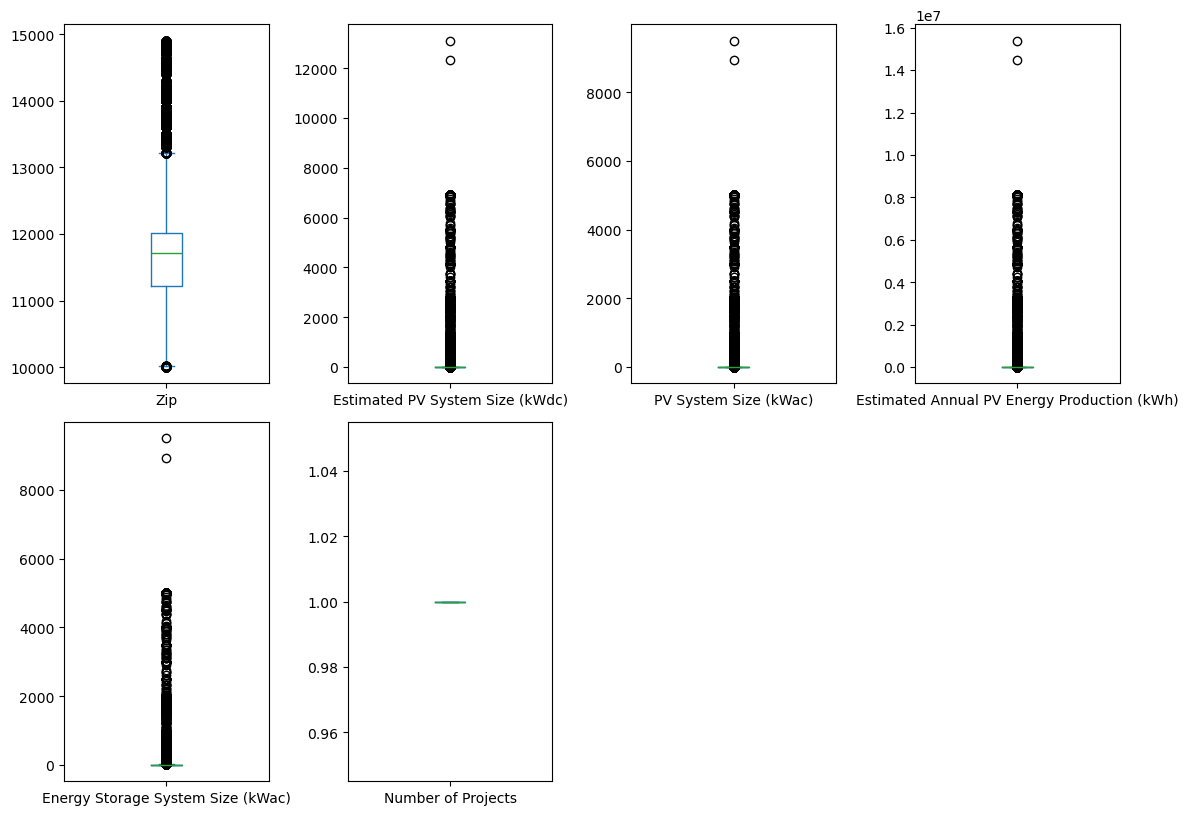

In [69]:
# Create box plots for all columns

data.plot(kind='box', subplots=True, layout=(len(data.columns) // 4, 4), figsize=(12, 12), sharex=False, sharey=False)
plt.tight_layout()
#plt.savefig('Boxplot_solarzone.png')
plt.show()


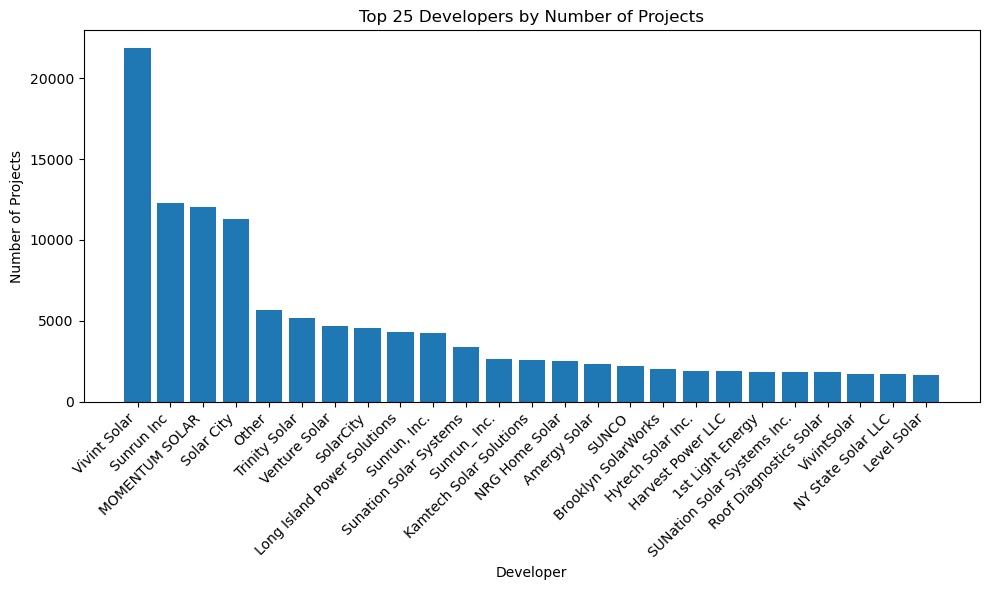

In [30]:
# Assuming your DataFrame is named 'df'
developer_counts = data_cleaned['Developer'].value_counts().head(25)  # Get the top 25 developers

plt.figure(figsize=(10, 6))
plt.bar(developer_counts.index, developer_counts)
plt.xlabel('Developer')
plt.ylabel('Number of Projects')
plt.title('Top 25 Developers by Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Top 25 Developers by Number of Projects.png')
plt.show()


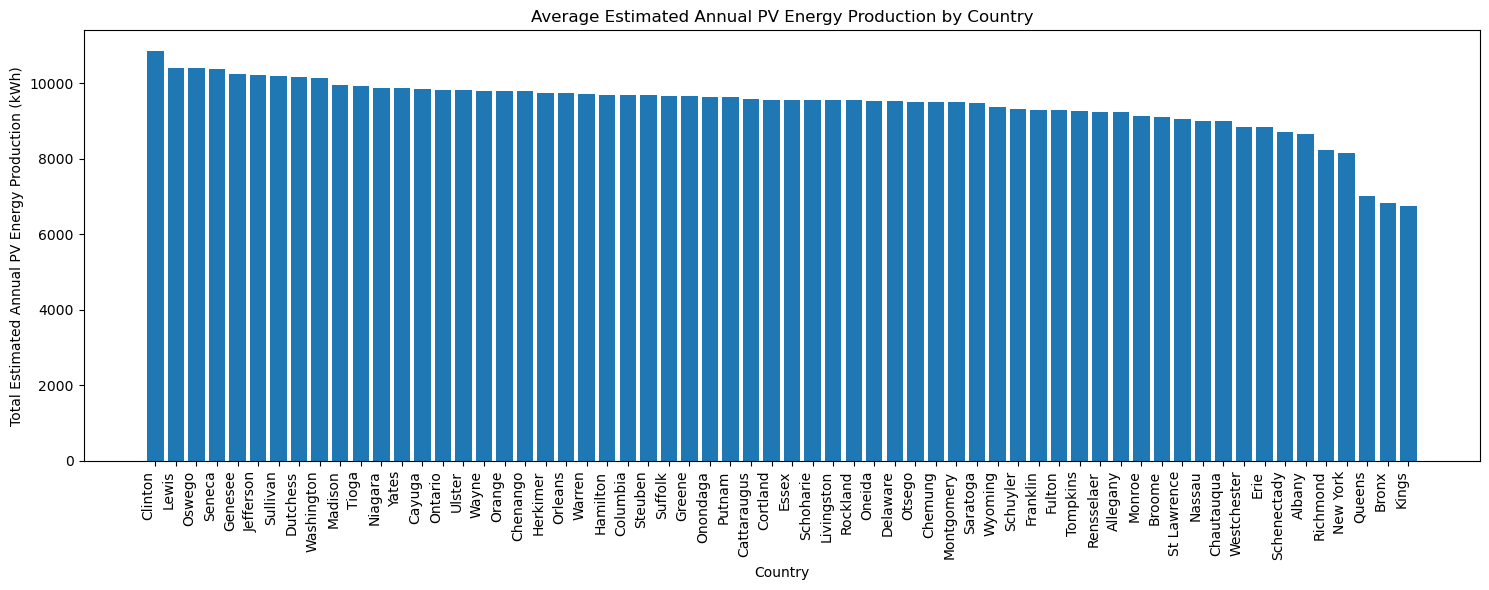

In [72]:
# Group data by country and mean energy production
country_energy = data_cleaned.groupby('Country')['Estimated Annual PV Energy Production (kWh)'].mean().reset_index()

# Sort the DataFrame by 'Estimated Annual PV Energy Production (kWh)' in ascending order
country_energy = country_energy.sort_values(by=['Estimated Annual PV Energy Production (kWh)'], ascending=False)


# Create the bar chart
plt.figure(figsize=(15, 6))  # Adjust figure size if needed
plt.bar(country_energy['Country'], country_energy['Estimated Annual PV Energy Production (kWh)'])
plt.xlabel('Country')
plt.ylabel('Total Estimated Annual PV Energy Production (kWh)')
plt.title('Average Estimated Annual PV Energy Production by Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
#plt.savefig('Average Estimated Annual PV Energy Production by Country.png')
plt.show()

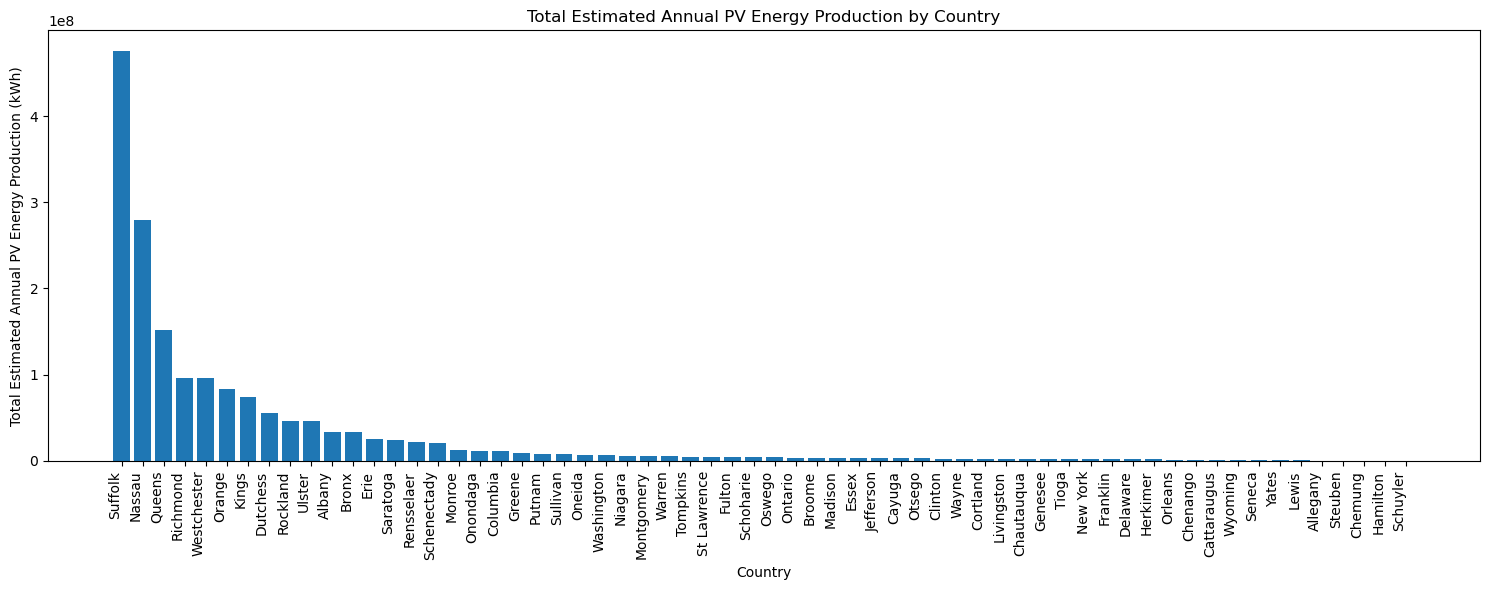

In [73]:
# Group data by country and sum energy production
country_energy = data_cleaned.groupby('Country')['Estimated Annual PV Energy Production (kWh)'].sum().reset_index()

# Sort the DataFrame by 'Estimated Annual PV Energy Production (kWh)' in ascending order
country_energy = country_energy.sort_values(by=['Estimated Annual PV Energy Production (kWh)'], ascending=False)


# Create the bar chart
plt.figure(figsize=(15, 6))  
plt.bar(country_energy['Country'], country_energy['Estimated Annual PV Energy Production (kWh)'])
plt.xlabel('Country')
plt.ylabel('Total Estimated Annual PV Energy Production (kWh)')
plt.title('Total Estimated Annual PV Energy Production by Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
#plt.savefig('Total Estimated Annual PV Energy Production by Country.png')
plt.show()

In [33]:
data_cleaned['Metering Method'].value_counts()

Metering Method
NM     195891
RNM       188
CDG        63
RC         21
Name: count, dtype: int64

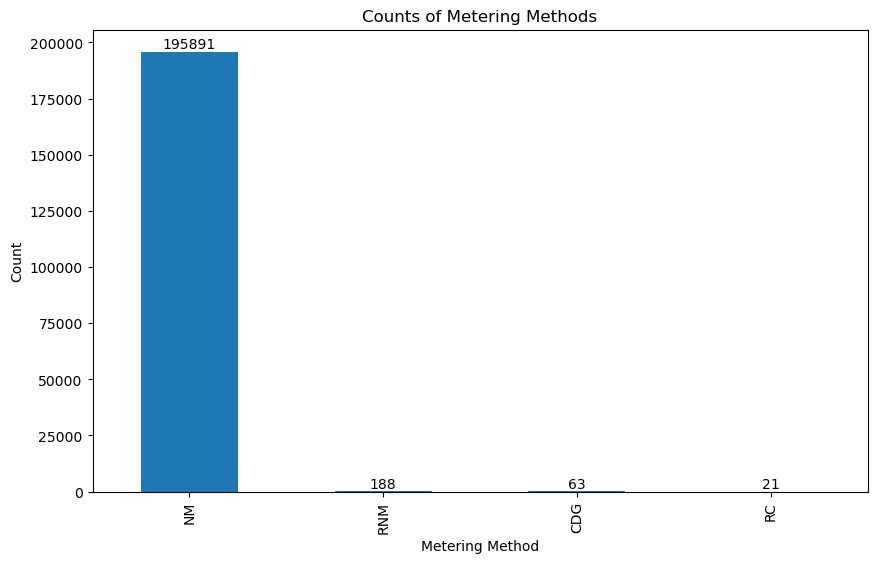

In [74]:
value_counts = data_cleaned['Metering Method'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = value_counts.plot(kind='bar')
plt.title('Counts of Metering Methods')
plt.xlabel('Metering Method')
plt.ylabel('Count')

# Add count labels on top of each bar
for i in ax.containers:
    ax.bar_label(i)
#plt.savefig('Counts of metering methods.png')
plt.show()


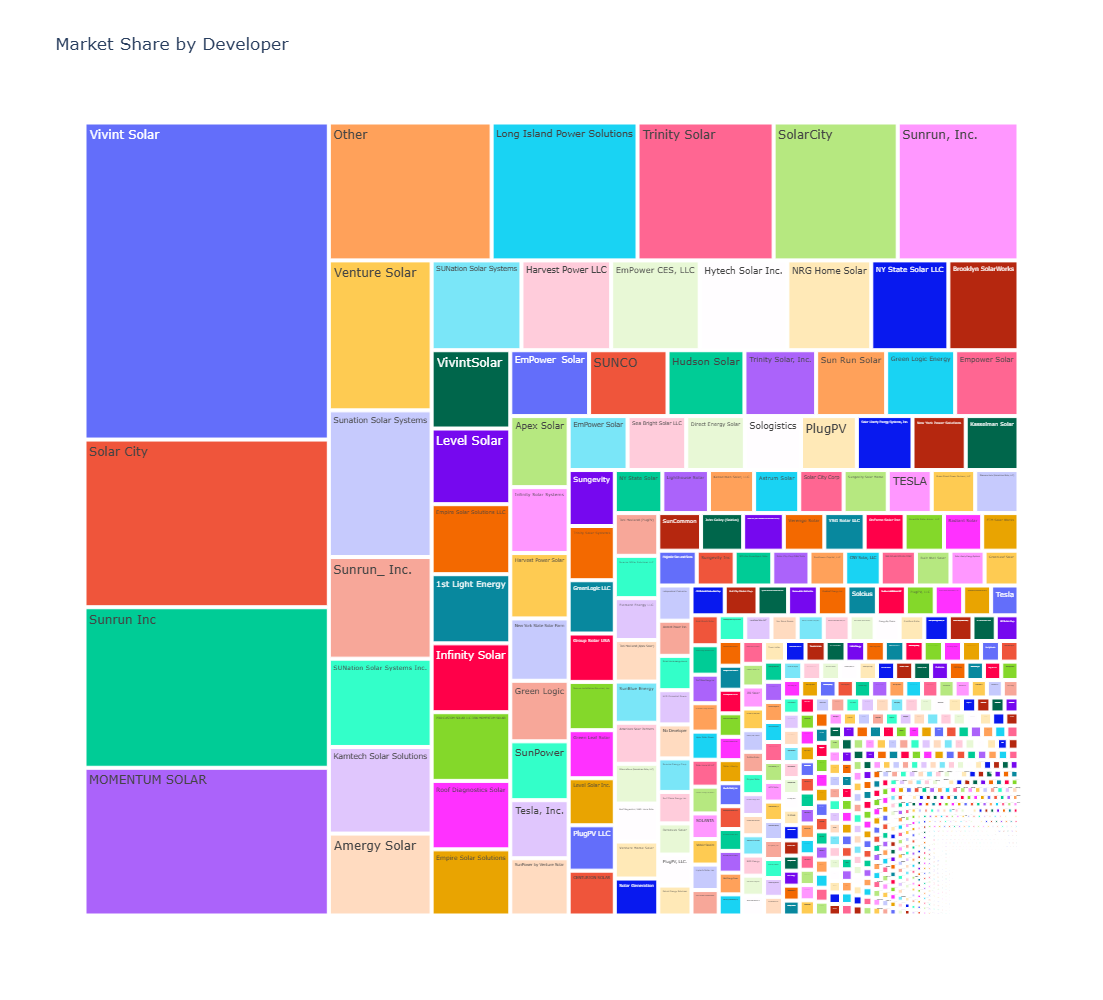

In [47]:
import plotly.express as px

fig = px.treemap(
    data_cleaned, 
    path=['Developer'], 
    values='Estimated Annual PV Energy Production (kWh)', 
    title='Market Share by Developer')

# Adjust the figure size
fig.update_layout(
    width=1000,  # Set the width of the figure
    height=1000   # Set the height of the figure
)

fig.show()


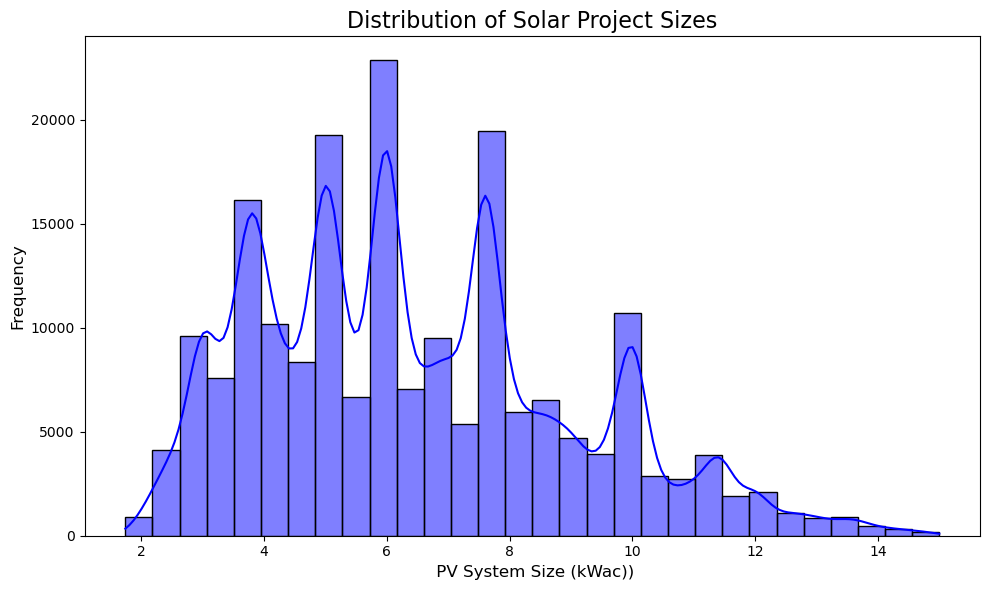

In [75]:
# Plot histogram of project sizes

plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['PV System Size (kWac)'], bins=30, kde=True, color="blue")
plt.title("Distribution of Solar Project Sizes", fontsize=16)
plt.xlabel(" PV System Size (kWac))", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.tight_layout()
#plt.savefig('Distibution of solarproject sizes.png')
plt.show()


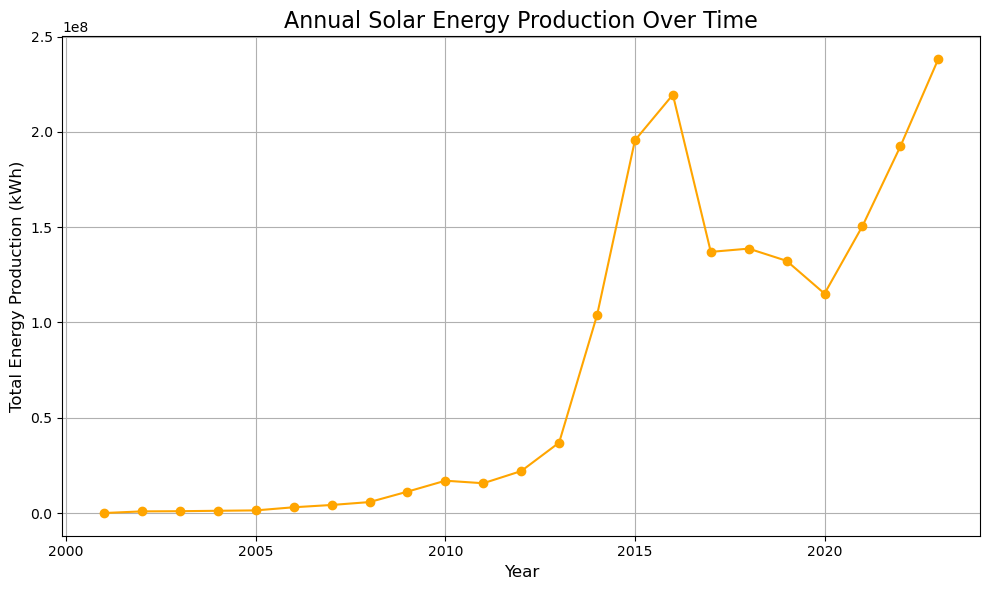

In [120]:
# Aggregate data by year
yearly_data = data_cleaned.groupby(data_cleaned['Interconnection Date'].dt.year)['Estimated Annual PV Energy Production (kWh)'].sum()

# Plot time-series
plt.figure(figsize=(10, 6))
plt.plot(yearly_data.index, yearly_data.values, marker="o", linestyle="-", color="orange")
plt.title("Annual Solar Energy Production Over Time", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Total Energy Production (kWh)", fontsize=12)
plt.grid()
plt.tight_layout()
plt.savefig('Annual Solar Energy Production Over Time.png')
plt.show()


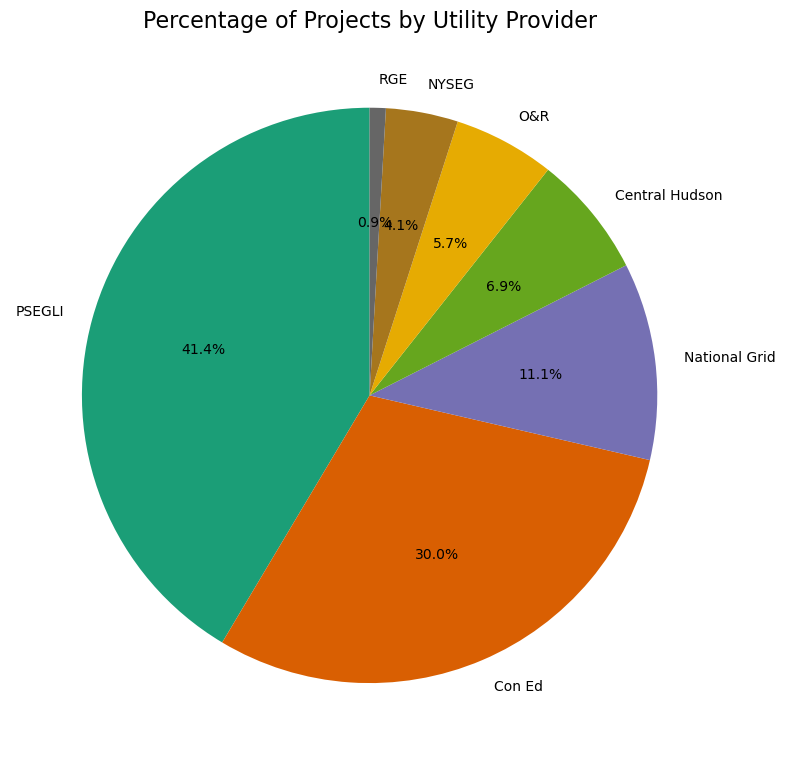

In [81]:
# Aggregate by utility
utility_data = data_cleaned['Utility'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
utility_data.plot.pie(autopct='%1.1f%%', startangle=90, cmap="Dark2")
plt.title("Percentage of Projects by Utility Provider", fontsize=16)
plt.ylabel("")
plt.tight_layout()
#plt.savefig('Percentage of Projects by Utility Provider.png')
plt.show()


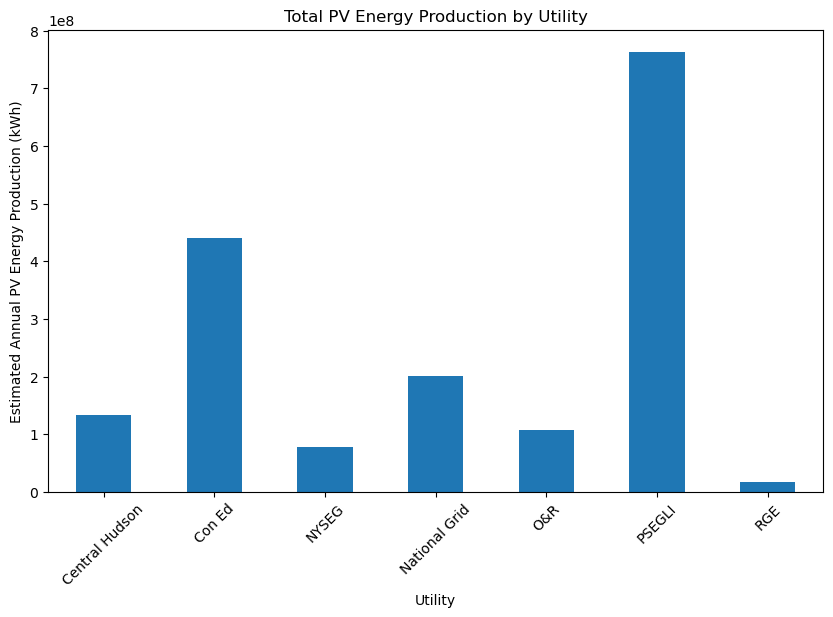

In [83]:


plt.figure(figsize=(10, 6))
data_cleaned.groupby('Utility')['Estimated Annual PV Energy Production (kWh)'].sum().plot(kind='bar')
plt.xlabel('Utility')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.title('Total PV Energy Production by Utility')
plt.xticks(rotation=45)
#plt.savefig('Total PV Energy Production by Utility.png')
plt.show()

# Modeling

In [59]:

solar_data_clean = data_cleaned[['Country', 'Estimated Annual PV Energy Production (kWh)']]
solar_data_clean = solar_data_clean.groupby('Country').mean().reset_index()

# Prepare data for clustering
X = solar_data_clean[['Estimated Annual PV Energy Production (kWh)']]

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



## Model 1(Kmeans)

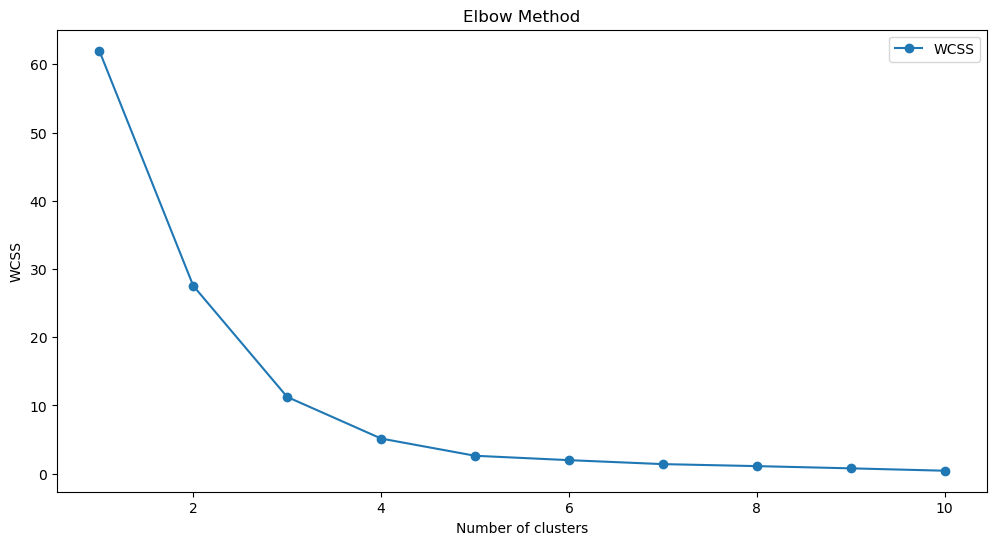

In [123]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#calculate Within-Cluster Sum of Squares (WCSS) for different numbers of  clusters
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o',label='WCSS')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(False)
plt.savefig('Elbowmethod_kmeans.png')
plt.show()

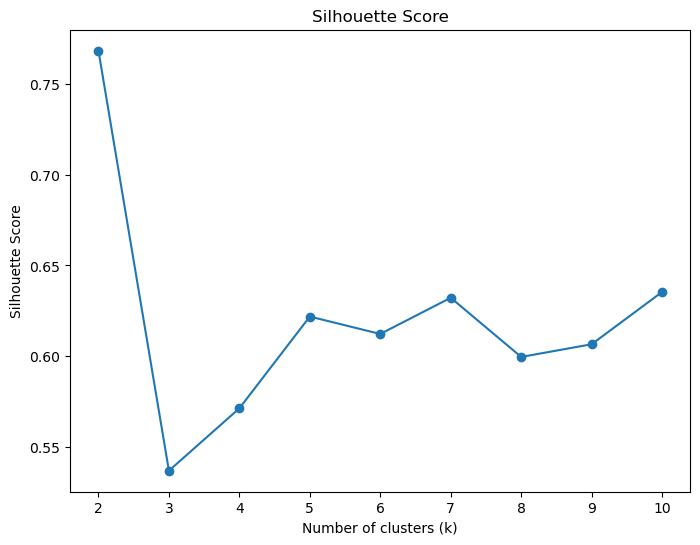

In [124]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):  # Start from 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
#plt.savefig('Silhouette Score.png')
plt.show()

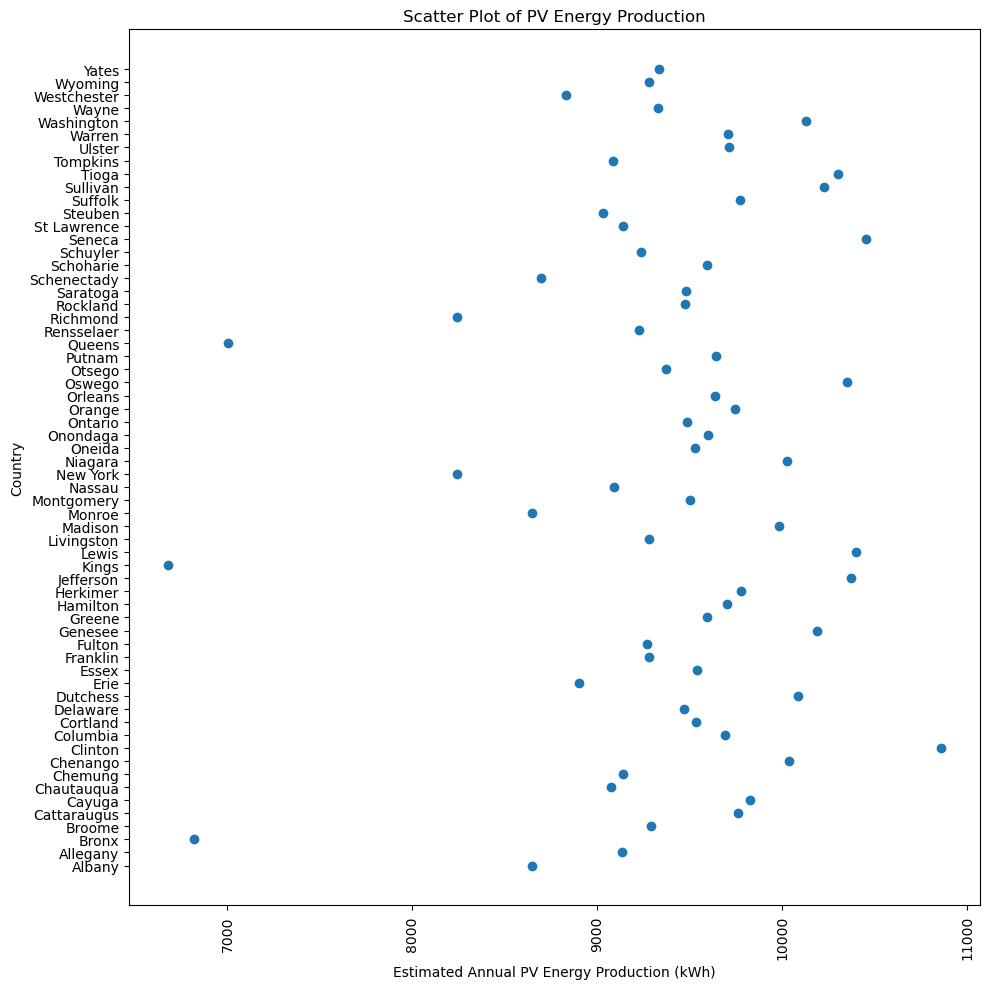

In [125]:
import matplotlib.pyplot as plt
# Set the figure size 
plt.figure(figsize=(10, 10))

# Create the scatter plot
plt.scatter( solar_data_clean['Estimated Annual PV Energy Production (kWh)'],solar_data_clean['Country'])

# Add labels and title
plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.ylabel("Country")
plt.xticks(rotation=90)
plt.title("Scatter Plot of PV Energy Production")
plt.tight_layout()
#plt.savefig('scatter plot of pv energy production.png')
plt.show()


In [108]:
from sklearn.cluster import KMeans


# Perform K-means clustering
kmeans = KMeans(n_clusters=5,max_iter=300, random_state=42)
solar_data_clean['cluster'] = kmeans.fit_predict(X_scaled)

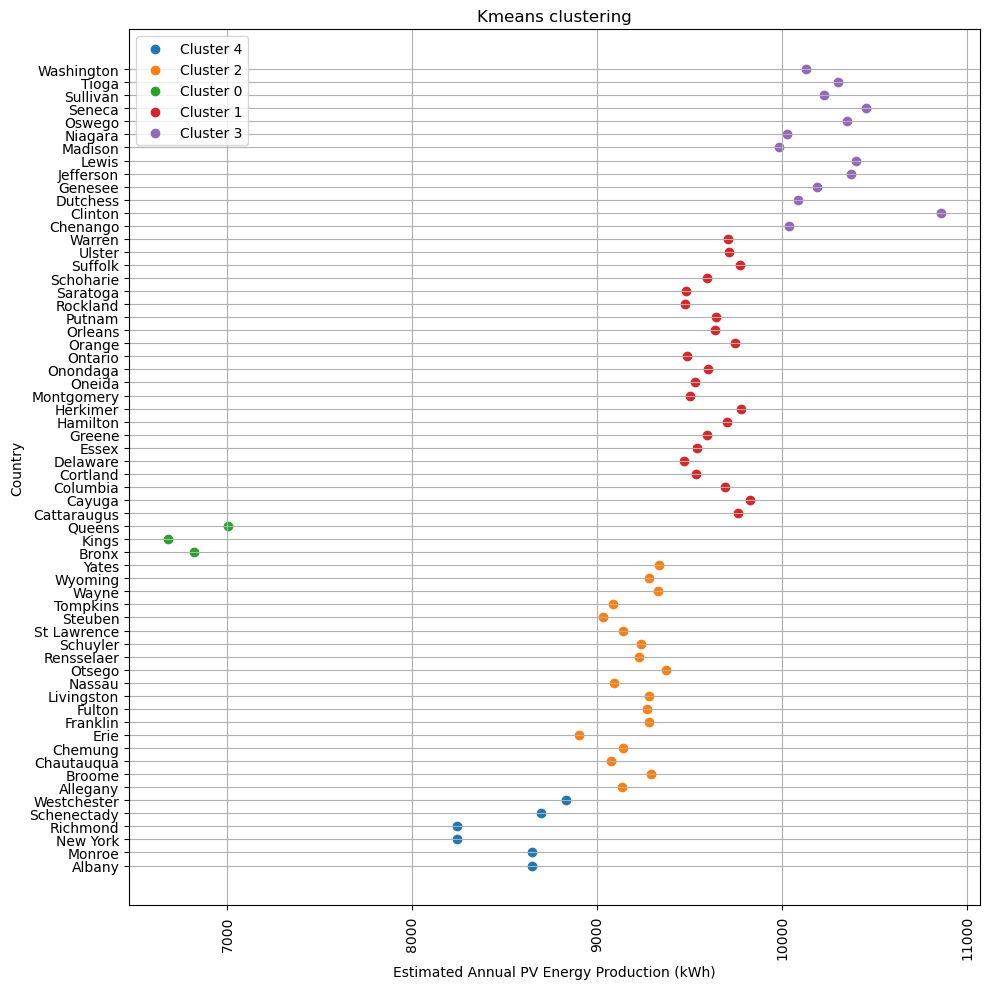

In [126]:
# Create a scatter plot
plt.figure(figsize=(10, 10))
for cluster in solar_data_clean['cluster'].unique():
    cluster_data = solar_data_clean[solar_data_clean['cluster'] == cluster]
    plt.scatter(cluster_data['Estimated Annual PV Energy Production (kWh)'],cluster_data['Country'], label=f'Cluster {cluster}')

plt.title('Kmeans clustering')
plt.xlabel('Estimated Annual PV Energy Production (kWh)')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.legend()
#plt.savefig('kmeas clustering')
plt.show()

In [127]:
from sklearn.metrics import silhouette_score


silhouette_avg = silhouette_score(X, solar_data_clean['cluster'])
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.6217798830877307


In [112]:
solar_data_clean.columns

Index(['Country', 'Estimated Annual PV Energy Production (kWh)', 'cluster'], dtype='object')

## Model 2(MeanShift)

In [97]:
from sklearn.cluster import MeanShift
from sklearn.datasets import make_blobs


# Create and fit the Mean Shift model
bandwidth = 2  # Adjust bandwidth as needed
ms = MeanShift(bandwidth=bandwidth)
ms.fit(X)

# Get cluster labels and centers
labels_2 = ms.labels_
cluster_centers = ms.cluster_centers_

# Number of clusters found
n_clusters_2 = len(np.unique(labels_2))

print("Number of estimated clusters: %d" % n_clusters_2)



Number of estimated clusters: 53


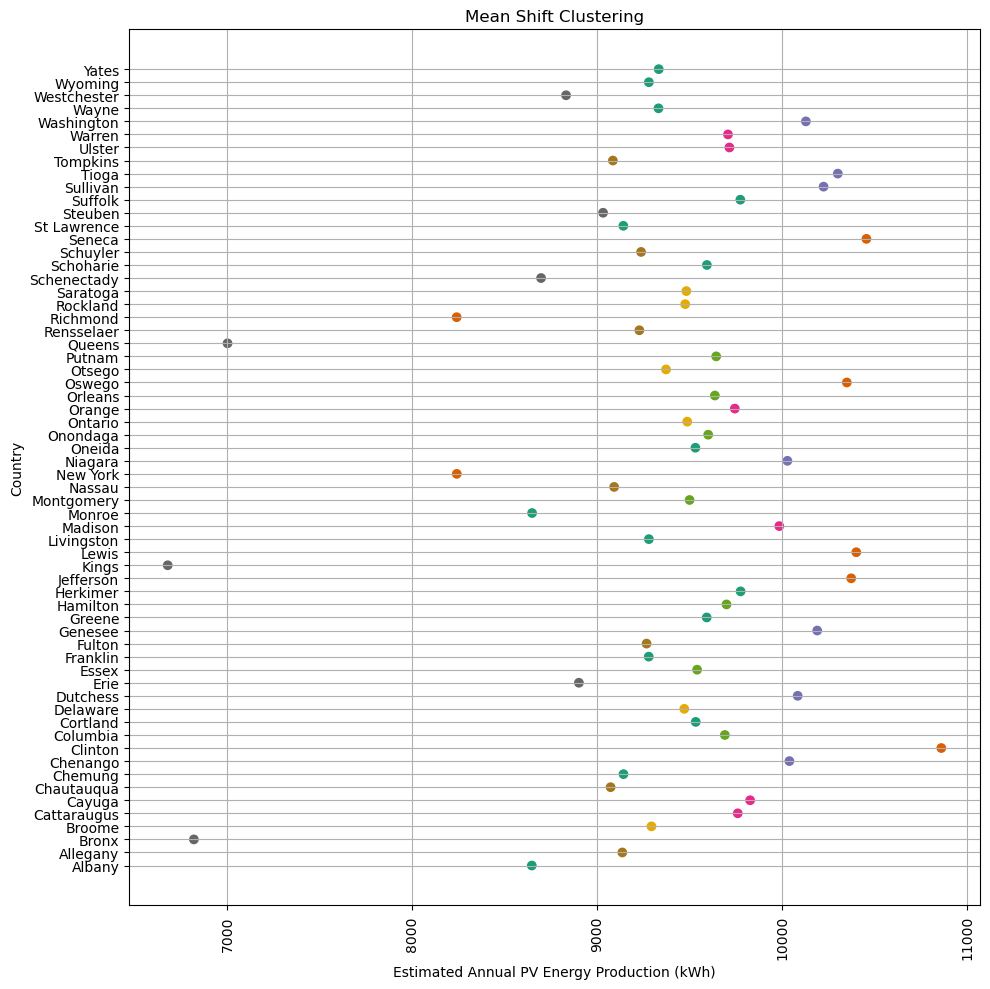

In [128]:
# Extract the unique countries corresponding to the clustered data points
countries = data_cleaned.groupby('Country').agg({'Estimated Annual PV Energy Production (kWh)': 'mean'}).reset_index()['Country'].values

# Plot using the clustered data and corresponding countries
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
plt.scatter(X, countries, cmap='Dark2', c=labels_2)

plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.ylabel("Country")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title("Mean Shift Clustering")
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent overlapping labels
#plt.savefig('Meanshift clustering.png')
plt.show()

In [129]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels_2)  # X is your data, labels are cluster assignments
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.25122207765793597


## Model 3(DBSCAN)

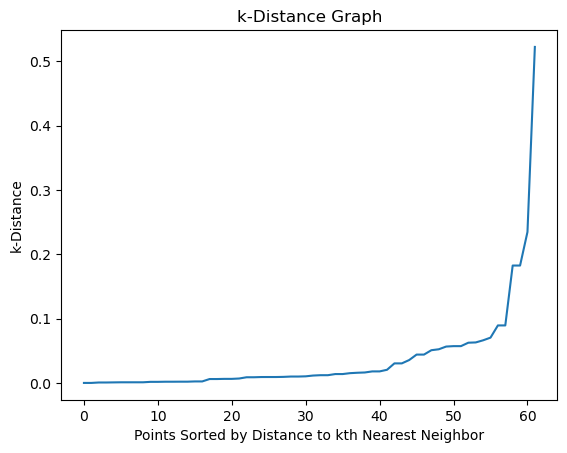

In [130]:
from sklearn.neighbors import NearestNeighbors

# Find optimal eps using k-distance graph
neighbors = NearestNeighbors(n_neighbors=2 * X_scaled.shape[1])  # Use 2 * dimensions for min_samples
distances, indices = neighbors.fit(X_scaled).kneighbors(X_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:, 1]  # Get the distances to the kth nearest neighbor

plt.plot(distances)
plt.xlabel("Points Sorted by Distance to kth Nearest Neighbor")
plt.ylabel("k-Distance")
plt.title("k-Distance Graph")
#plt.savefig('k-Distance.png')
plt.show()

In [131]:
from sklearn.cluster import DBSCAN

# Create and fit the DBSCAN model
dbscan = DBSCAN(eps=0.1, min_samples=2 * X_scaled.shape[1])  # Adjust eps and min_samples as needed
dbscan.fit(X_scaled)  # Use scaled data for clustering

# Get cluster labels
labels_3 = dbscan.labels_


# Number of clusters found
n_clusters = len(np.unique(labels_3))

print("Number of estimated clusters: %d" % n_clusters)


Number of estimated clusters: 8


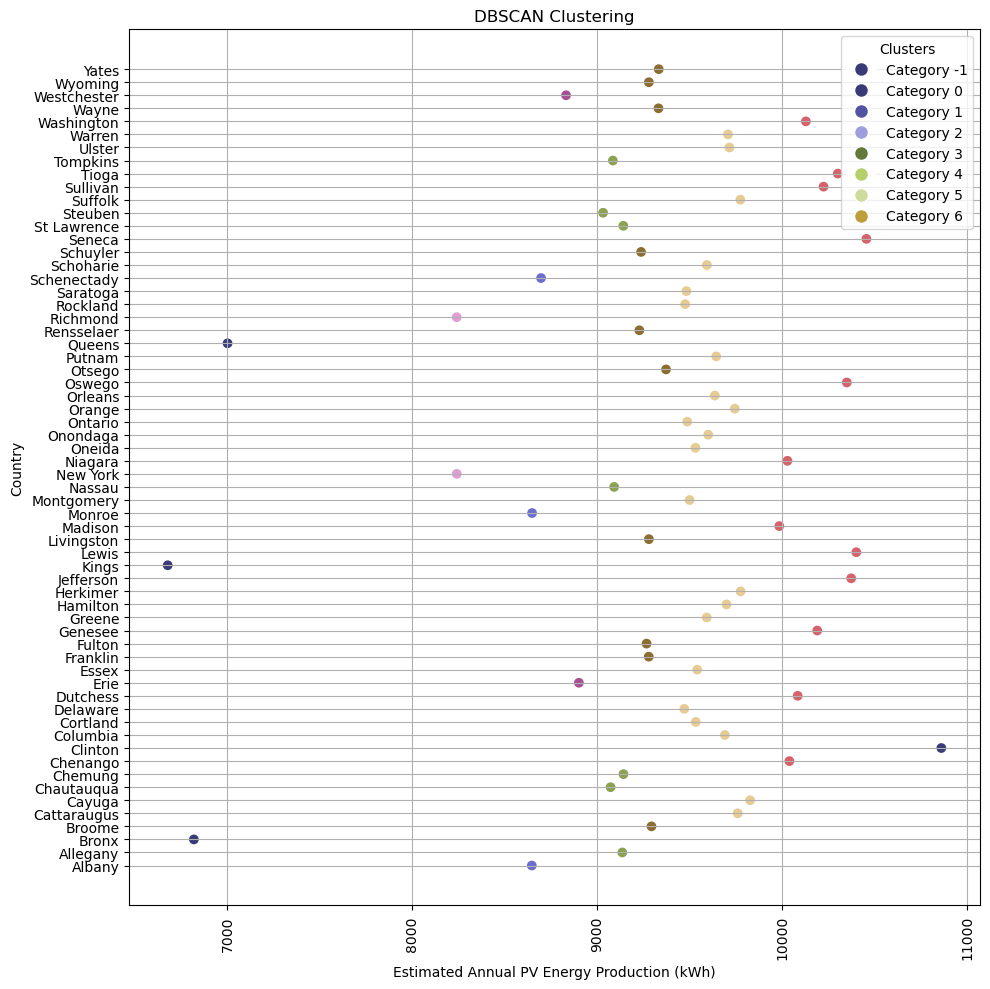

In [132]:
# Extract the unique countries corresponding to the clustered data points
countries = data_cleaned.groupby('Country').agg({'Estimated Annual PV Energy Production (kWh)': 'mean'}).reset_index()['Country'].values

# Plot using the clustered data and corresponding countries
plt.figure(figsize=(10, 10)) # Adjust figure size as needed
cmap = plt.colormaps.get_cmap('tab20b')  # 'tab20b' provides 20 distinct colors

plt.scatter(X, countries, cmap = cmap, c=labels_3)
plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.ylabel("Country")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title("DBSCAN Clustering")
plt.grid(True)

# Create a legend with all 13 categories
unique_labels = np.unique(labels_3)
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(i/13), markersize=10) for i in unique_labels]
legend_labels = [f'Category {i}' for i in unique_labels]
plt.legend(handles, legend_labels, title="Clusters")

plt.tight_layout() # Adjust layout to prevent overlapping labels
#plt.savefig('DBSCAN clustering.png')
plt.show()

In [133]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels_3) 
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5873559615458561


## Model 4(SpectralClustering)

In [104]:
from sklearn.cluster import SpectralClustering


# Create and fit the Spectral Clustering model
n_clusters = 3  # Choose the number of clusters you want
spectral = SpectralClustering(n_clusters=n_clusters, affinity='rbf', assign_labels='kmeans') 
spectral.fit(X_scaled)  # Use scaled data for clustering

# Get cluster labels
labels_4 = spectral.labels_

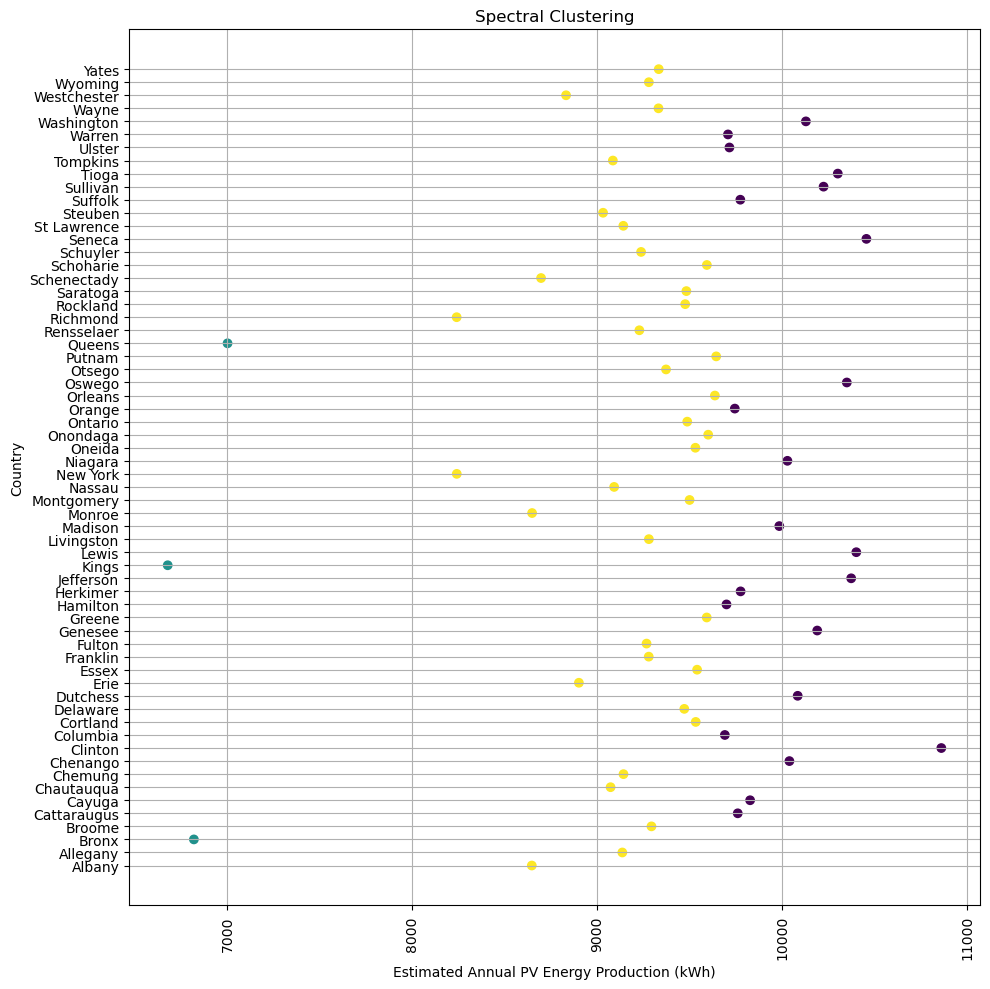

In [146]:
# Extract the unique countries corresponding to the clustered data points
countries = data_cleaned.groupby('Country').agg({'Estimated Annual PV Energy Production (kWh)': 'mean'}).reset_index()['Country'].values

# Plot using the clustered data and corresponding countries
plt.figure(figsize=(10, 10)) # Adjust figure size as needed

# Create a colormap with 3 distinct colors
cmap = plt.colormaps.get_cmap('viridis')

scatter = plt.scatter(X, countries, cmap=cmap, c=labels_4)
plt.xlabel("Estimated Annual PV Energy Production (kWh)")
plt.ylabel("Country")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.title("Spectral Clustering")
plt.grid(True)
plt.tight_layout() # Adjust layout to prevent overlapping labels
#plt.savefig('spectral clustering.png')
plt.show()

In [135]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels_4) 
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.5191444070276362


# Geograpical Map Visuial

In [136]:
pip install folium

In [137]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [147]:
import folium
from geopy.geocoders import Nominatim

# Initialize geolocator
geolocator = Nominatim(user_agent="geoapi")

# Create a function to get latitude and longitude for a county
def get_lat_lon(country):
    try:
        location = geolocator.geocode(f"{country}")
        if location:
            return location.latitude, location.longitude
        else:
            return None, None
    except Exception as e:
        print(f"Geocoding error for {country}: {e}")
        return None, None

# Get latitude and longitude for each country
solar_data_clean[['Latitude', 'Longitude']] = solar_data_clean['Country'].apply(
    lambda x: pd.Series(get_lat_lon(x))
)


In [148]:
# Create a folium map centered at an approximate location
ny_map = folium.Map(location=[42.9, -75.0], zoom_start=7)

# Define cluster colors
cluster_colors = {0: 'green', 1: 'red', 2: 'orange',3:'purple',4:'blue'}

# Add county markers to the map
for _, row in solar_data_clean.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=8,
        color=cluster_colors[row['cluster']],
        fill=True,
        fill_color=cluster_colors[row['cluster']],
        fill_opacity=0.7,
        popup=f"{row['Country']}: {row['Estimated Annual PV Energy Production (kWh)']} kWh",
    ).add_to(ny_map)

# Save the map as an HTML file
#ny_map.save("solar_energy_clusters.html")

print("Interactive map created and saved as 'solar_energy_clusters.html'.")

Interactive map created and saved as 'solar_energy_clusters.html'.


In [151]:
output13 = pd.merge(data_cleaned,solar_data_clean,on = 'Country',how ='right')

In [154]:
output13.to_excel('solar_clustering.xlsx',index=False)